# Health Information Systems and Decision Support Systems
## WPO 1: Introduction to data analysis and visualization  (25/02/22)

*Jakub Ceranka, Pieter Boonen, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>
Aneruth Mohansundaram <br>
Ishan Raychaudhuri
</font>

### Goal
The goal of this practical session is to obtain insight in basic data analysis and data visualization techniques using Jupyter notebook. Basic operations presented today will be very useful during the next practical sessions, where you will need to design and build different decision systems. In this practical session, basic libraries like *pandas*, *matplotlib* and *seaborn* are introduced and applied to the Wisconsis breast cancer data set. Students must send their notebook using Assignment functionality of Canvas using .ipynb __and__ .html format __before 23:59 on the 4th of March__. All practical sessions are graded. Additionally, a general feedback will be provided in the next practical session. 

__Hints__ for all practical sessions:
- Make sure that the code is pre-compiled and all output is generated correctly before handing in your notebook
- Pay attention to the layout of your figures (labels, titles, legends, colors,...)
- Chose relevant abbrevations for your variables, make sure your variables are not overwritten
- Read all assignments thoroughly
***
### Jupyter notebook

Jupyter notebook is an open-source application that allows editing and running notebook documents via a web browser. Notebook documents contain both computer code (python) and text elements (paragraphs, equations, figures,...). In this way, notebook files can serve as a complete computational record of a session, interleaving executable code with explanatory text, mathematics, and rich representations of resulting objects. Notebooks may be exported to a range of static formats, including HTML, reStructuredText, LaTeX and PDF. Basic functionalities of the Jupyter notebook are presented [here](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html).
***
### The breast cancer Wisconsin (diagnostic) data set

#### Fine needle aspirate procedure:
The dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of breast mass. For this type of biopsy technique, a thin hollow needle is inserted into an area of abnormal-appearing tissue for sampling cells. This sample is examined under a microscope which is used in the diagnosis of cancer. FNA is generally considered a safe procedure. 
***
#### FNA images:
The image below represents a smear of nuclei of benign and malignant breast mass cells. A difference in shape, size and smoothness of cells is visible.

 ![Image of cells](./FNA_cells.png "FNA_cells")
 
[<cite>Sizilio et al. 2012</cite>](https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/1475-925X-11-83) 
***
#### Features:
In oder to describe the images with numerical values, which can be easily interpreted by a computer, the features term has to be introduced. Features describe characteristics of the nuclei present in the microscopic image. Usually, the more of the independent features describing the image, the better.

Each cell nuclei has an independent set of features describing its individual properties:
- ID number of the patient from which the cell was collected.
- The medical diagnosis label assessed by a histologist/oncologist: Malignant or Benign. 
- The mean, standard deviation and the 3 worst values of 10 features describing mathematical properties of a cell were computed. This included:
        a) radius (distance from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension  (measure of cells self-similarity)
  
Some features were computed automatically, using automatic image processing algorithms, others acquired manually by medical experts. Microscopic images of 569 cells were analysed and labeled as benign or malignant. 
Class distribution: 357 benign, 212 malignant.
***
### Libraries

During this practical session, multiple libraries will be used for the analysis and visualization of data. You can use different version of libraries, however we recommend the following build:

- [__Pandas__](https://pandas.pydata.org/pandas-docs/stable/tutorials.html):     high performance library used for processing data structures and data analysis. __V 0.22.0__ 
- [__Numpy__](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html):      library used for scientific computing containing N-dimensional arrays, functions and Fourier transform. __V 1.13.3__ 
- [__Sci-kit Learn__](http://scikit-learn.org/stable/index.html):     Simple and efficient tools for machine learning and data analysis. __V 0.19.1__ 
- [__Matplotlib__](https://matplotlib.org/users/pyplot_tutorial.html): plotting library used for the visualization of data from python. __V 2.1.0__ 
- [__Seaborn__](https://seaborn.pydata.org/):    visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics. __V 0.8.1__ 

To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. The following code imports Pandas and represents it as 'pd'. You can additionally check for the module version using __version__ command. Information on updating the libraries using Anaconda can be found  [here](http://conda-test.pydata.org/docs/examples/update.html).

In [1]:
import pandas as pd
print(pd.__version__)

1.4.1


***
### Task 1: Importing data  

Provided dataset is represented as the comma-separated values (.csv) file which stores the tabular data in plain text.

Load the dataset (dataWisconsinBreast.csv) as the dataframe object using Panda's __read_csv__ function and have a look at the data using the __head()__ command. By default, the statement will print out top 5 rows of the dataset.
The __info()__ method is useful to get a quick description of the data, in particular the total number of rows, and each feature's type and number of non-null values.

Hint: To use a command from a library, type the abbrevation of the library followed by a dot and the function  


*<strong>OUR CODE STARTS HERE</strong>*

In [2]:
dataset = pd.read_csv('dataWisconsinBreast.csv')
print(dataset.head(5))
print(f'\n{dataset.info()}')

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

***
### Task 2: Dataset preprocessing

Lets have a closer look at the dataset. Using inbuilt Pandas function check if the dataset's shape matches with number of cells (rows) and features (columns) provided in the section 'Features'. 

__Hint: Something on the index for a column?__

Print the __head()__ of the dataframe again. The first column of the dataset is a random patients ID number which does not bring any clinically relevant information to the dataset. The last column represents NaN (not a number values). Remove these columns from the dataset and check if the shape has decreased accordingly. Additionally, remove all features which do not represent the mean (\_mean) value and assign it to the new dataframe.

The next step is to normalize (min-max scaling) the values. Most machine learning algorithms don't perform well when the numerical input values have very different scales. To rescale the data, we subtract the minimum from every value and divide by the maximum minus the minimum ($\frac{value-min}{max-min}$). 

Hint: Use __MinMaxScaler__ from __sklearn__ for the normalization. 

Now that the values are all normalized, the name of the features should be changed as well. Add *_N* after each feature using __rename()__ .

Hint: Printing a list with the names of the features will save you some time 

You can see that the dataset 'diagnosis' column has either M or B symbol, representing respectively malignant or benign cancer classification label. Split the dataframe into two datasets, representing all benign and malignant rows of features. Does the shapes of new datasets match the dataset class distribution? 

Save all three new datasets (cropped with B and M, cropped B and cropped M) as the .csv files in your working directory. Use these normalized datasets for the next tasks. 

*<strong>OUR CODE STARTS HERE</strong>*

In [3]:
row,col = dataset.shape
print(f'Dataset with {row} rows and {col} columns before removing features')

Dataset with 569 rows and 33 columns before removing features


In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Removing the last column since we have NaN as the unique value which is irrelevant to the task
dataset = dataset.iloc[:,1:-1]
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Fetching all the mean features for normalising
idxVal = list(pd.Index(dataset.columns.str.endswith('_mean'))) # returns the boolean value if it ends with '_mean' returns true else false
idx = [id for id,val in enumerate(idxVal) if val == True] # prints this [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
maxVal = max(idx) # Since it is series so we choose only max val for indexing
meanDataSet = dataset.iloc[:,:maxVal+1]
f'Dataset shape with {meanDataSet.shape[0]} rows and {meanDataSet.shape[1]} columns after removing unwanted features'

'Dataset shape with 569 rows and 11 columns after removing unwanted features'

In [7]:
meanDataSet.head() # Checking the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [8]:
# Normalising the feature values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normCol = [str(i)+'_N' for i in meanDataSet.iloc[:,1:].columns]
normData = pd.DataFrame(scaler.fit_transform(meanDataSet.iloc[:,1:]),columns=normCol)
normData['diagnosis'] = meanDataSet['diagnosis']

In [9]:
# Split the dataset into two subsets
cropped_M = normData.loc[normData['diagnosis'] == 'M']
cropped_B = normData.loc[normData['diagnosis'] == 'B']
f'Shape of cropped malgninant dataset is {cropped_M.shape} and shape of cropped benign dataset is {cropped_B.shape}'

'Shape of cropped malgninant dataset is (212, 11) and shape of cropped benign dataset is (357, 11)'

In [10]:
cropped_M

,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,M
...,...,...,...,...,...,...,...,...,...,...,...
563,0.659709,0.520122,0.685578,0.510498,0.517017,0.626403,0.743674,0.732604,0.550000,0.396588,M
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,M
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,M
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,M


In [11]:
cropped_B

,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N,diagnosis
19,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.162174,B
20,0.288655,0.202908,0.289130,0.159703,0.495351,0.330102,0.107029,0.154573,0.458081,0.382266,B
21,0.119409,0.092323,0.114367,0.055313,0.449309,0.139685,0.069260,0.103181,0.381313,0.402064,B
37,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,0.205556,0.182603,B
46,0.057504,0.241123,0.054730,0.024772,0.301255,0.122845,0.037207,0.029409,0.358081,0.317397,B
...,...,...,...,...,...,...,...,...,...,...,...
558,0.360121,0.438620,0.363486,0.217858,0.289790,0.348506,0.241097,0.185686,0.198990,0.242418,B
559,0.214350,0.480893,0.212356,0.110286,0.360928,0.253727,0.260544,0.204026,0.165657,0.331508,B
560,0.334564,0.589787,0.328865,0.193807,0.421233,0.285933,0.104545,0.213917,0.240909,0.247473,B
561,0.199678,0.664863,0.185751,0.102863,0.197346,0.049690,0.000000,0.000000,0.000000,0.106571,B


In [12]:
# Saving three of our dataset
normData.to_csv('FullNormalisedData.csv',index=False)
cropped_B.to_csv('Cropped_Benign.csv',index=False)
cropped_M.to_csv('Cropped_Malignant.csv',index=False)

***
### Task 3: Dataset statistics

In order to understand the differences and behavior of the data we need to calculate basic statistical values of features. Calculate and print the mean, median, standard deviation and 25th, 75th percentile of the both: malignant and benign dataset for concavity_mean feature on the same figure. 

Using *pandas* and *matplotlib* library prepare a boxplot of the distribution of the mean radius feature for benign and malignant cells (__Hint:__ concatenate columns of interest and use pandas function boxplot()). 

describe() method shows a summary of the numerical attributes for all features.

Hint: In order to plot directly in Jupyter notebook use the following command: %matplotlib inline

*<strong>OUR CODE STARTS HERE</strong>*

In [14]:
# Calculating the basic stats features
# Load the dataset
benignData = pd.read_csv('Cropped_Benign.csv')
malignantData = pd.read_csv('Cropped_Malignant.csv')

In [15]:
malignantData.describe()

,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.496087,0.402263,0.494613,0.354136,0.453810,0.385890,0.376698,0.437326,0.438934,0.267904
std,0.151639,0.127814,0.151024,0.156071,0.113824,0.165596,0.175772,0.170844,0.139586,0.159505
min,0.187846,0.022658,0.194251,0.092513,0.190304,0.081805,0.056186,0.100944,0.125253,0.000000
25%,0.383075,0.325245,0.379760,0.238303,0.373567,0.276731,0.256619,0.321173,0.343687,0.139796
50%,0.489564,0.397362,0.486559,0.334464,0.447504,0.346512,0.354616,0.428827,0.423737,0.244629
75%,0.596763,0.475313,0.595225,0.449735,0.526271,0.469358,0.475750,0.512798,0.524495,0.360468
max,1.000000,1.000000,1.000000,1.000000,0.831182,1.000000,1.000000,1.000000,1.000000,1.000000


##### Note yet to check how to add the median

In [45]:
# A function to return all the values
from statistics import median
def fetchValues(dataset):
    colName = 'concavity_mean_N'
    values = dataset[colName].describe()
    med = dataset[colName].median()
    print(f'Median is:{med}')
    print(values)

In [46]:
benignScores = fetchValues(benignData)

Median is:0.0869025304592314
count    357.000000
mean       0.107914
std        0.101786
min        0.000000
25%        0.047587
50%        0.086903
75%        0.140558
max        0.962512
Name: concavity_mean_N, dtype: float64


In [47]:
malignantScores = fetchValues(malignantData)

Median is:0.35461574507966254
count    212.000000
mean       0.376698
std        0.175772
min        0.056186
25%        0.256619
50%        0.354616
75%        0.475750
max        1.000000
Name: concavity_mean_N, dtype: float64


<AxesSubplot:>

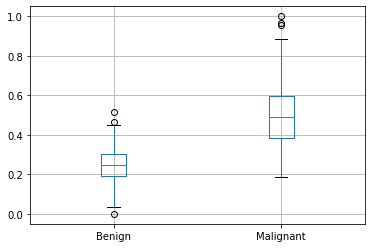

In [42]:
dataDf = pd.DataFrame(benignData['radius_mean_N'].rename('Benign'))
dataDf['Malignant'] = malignantData['radius_mean_N']
dataDf.boxplot()

Can you already spot the differences in data distributions between benign and malignant cancer? What conclusions regarding the size and shape of malignant vs benign cells can be drawn?

YOUR ANSWER HERE

***
### Task 4: Visualization of nuclei features

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). Using *matplotlib* plot a histogram of a mean radius of malignant cancer cells. On the same figure add a histogram (using a different color) of benign cancer cells radius (Hint: use *matplotlib* function hist() ). Do the histograms correlate with each other?

Histogram is a great tool to visualize the distribution of a single feature. However, often a dataset consists of several features and therefore another way of visualization has to be used.

A 2D scatterplot shows a relation between two features. Scatterplots are very often used to get a feeling of the data and work as a help tool for choosing a correct design of decision system which you will build during the next practical sessions.

Using *matplotlib*, plot on the same figure the relation of the radius_mean feature in function of the texture_mean feature for benign and malignant cases. Mark classes with different color and provide a legend box.

Scatterplots give a possibility to analyse the trends and relations between different features. Looking at the plotted scatterplot, you can see that there seem to be a linear relation between radius and texture. Lets try to find it.

Using linear regression from Sci-Kit learn toolbox, fit a linear function and plot it on the same scatterplot. Give the formula of the linear function.

*<strong>OUR CODE STARTS HERE</strong>*

In [52]:
## Histogram for numberical dataset: mean radius for each dataset
# importing the packages
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Count')

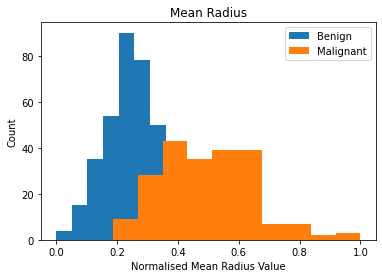

In [73]:
dataDf['Benign'].hist(grid=False,label='Benign')
dataDf['Malignant'].hist(grid=False,label='Malignant')
plt.title('Mean Radius')
plt.legend(loc='upper right')
plt.xlabel('Normalised Mean Radius Value')
plt.ylabel('Count')

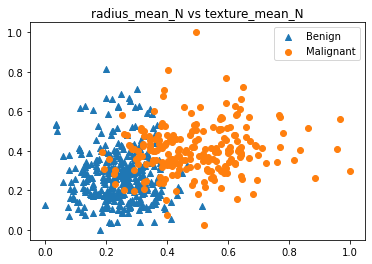

In [85]:
# Scatter plot for radius_mean vs texture_mean

# After analysing the dataset we can say that index pos 1 is radius_mean and index pos 2 is texture_mean so we slice the dataframe based on index position

scatterDataB = benignData.iloc[:, :2]
scatterDataM = malignantData.iloc[:,:2]

plt.scatter(scatterDataB['radius_mean_N'],scatterDataB['texture_mean_N'],marker='^',label='Benign')
plt.scatter(scatterDataM['radius_mean_N'],scatterDataM['texture_mean_N'],marker='o',label='Malignant')
plt.title('radius_mean_N vs texture_mean_N')
plt.legend(loc='upper right')

***
### Task 5: High-level visualization

A scatter plot is a good tool to visualize the distribution of values for small number of instances. However, with very large numbers of instances, all plotted points tent to become inseparable, forming one large cluster of the same color intensity. That issue can be solved by introduction of density plots. Density plot represents data in the same way as the scatterplot, but it changes its density dependent on the number of points in its vicinity. Using *seaborn* library and *kdeplot* function, plot a density plot of the same features (radius in function of texture) for two class labels (benign and malignant) on the same figure. You can easily see that it is much easier now to interpret and separate features.

You have plotted the relation between two features now, but what about all of the others. They probably contain additional relevant information for better understanding of the dataset. *Pandas* library provides an inbuilt function *scatter_matrix*, which shows a relations between all inputed features simultaneously. Use a complete dataset to create a scatter_matrix plot. 

Additionally to the graphical representation of feature pairs, numbers can be generated too. Use *pandas* *corr()* function to investigate correlations of radius_mean feature.
What can you say about the relation between radius_mean against different features? Are some features dependent on another? If so, which? Is it worth to use all of the features in your future machine learning system, why?


YOUR ANSWER HERE


You can now see the features distribution, but we can not distinguish which point in the provided scatter matrix corresponds to which class. Using *seaborn's pairplot* function print the scatter matrix of radius, texture and concavity for malignant and benign cells.

Could you print the same plot (radius, texture & concavity for malignant and benign cells) but instead of a seaborn scatterplot matrix (pairplot) use density distribution matrix (kdeplot matrix)?

##### OUR CODE STARTS HERE

In [74]:
# importing package
import seaborn as sns

### Task 6: Validation of classifier's performance 
Load prediction.csv file. The file stores support-vector machine classifier results for each instance in the dataset (classes malignant or benign). Inspect the prediction dataframe. Extract a column predicted from the prediction.csv dataset and column 'diagnosis' from the initial dataset (dataWisconsinBreast.csv) and store them in new dataframes. 

We are now going to assess the performance of the classifier. Write a python function counting and returning false positive, false negative, true positive and true negative instances. Using obtained statistical values, calculate accuracy, sensitivity, specificity of the classifier. 

Scikit-learn library provides functions such as *metrics.classification_report*, which calculate and printout the same measures. See the Classification metrics section of the user guide for further details. Does the output of the scikit-learn functions match the ones calculated by you?

Briefly describe the difference between calculated measures. 
During classification of breast biopsies, it is highly important not to miss a malignant case. In other words, we do not want our classifier to classify malignant cell as benign case. The performance of the classifier can be optimized towards such behavior. Which statistical measure should we optimize (increase) in order to decrease these wrong classifications as much as possible?

YOUR ANSWER HERE

*<strong>OUR CODE STARTS HERE</strong>*